In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.inspection import inspect
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
#exploring data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [18]:
measurement_columns = inspector.get_columns('measurement')
station_columns = inspector.get_columns('station')

In [19]:
for column in measurement_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
for date in recent_date:
    print(date)

2017-08-23


In [31]:
twelve_months = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
order_by(measurement.date.desc())
for row in twelve_months:
    print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11'

In [34]:
df = pd.DataFrame(twelve_months, columns = ['Date','Precipitation'])
df = df.dropna()
df

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [40]:
sorted_df = df.sort_values('Date', ascending = True)
sorted_df

,Date,Precipitation
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2227,2016-08-23,0.02
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


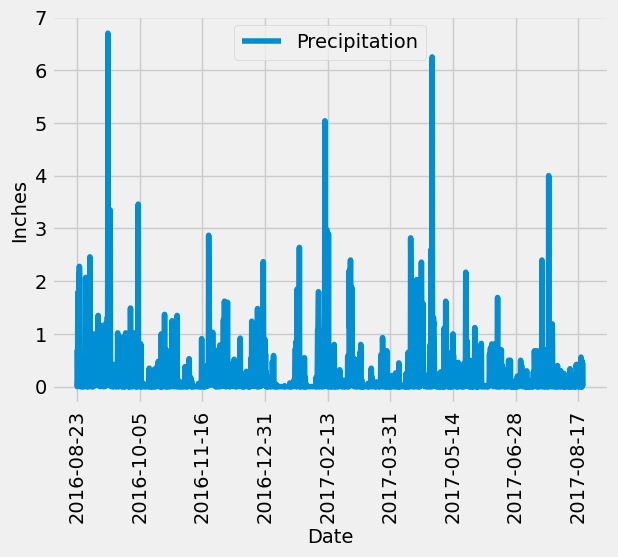

In [45]:
sorted_df_indexed = sorted_df.set_index('Date')
sorted_df_indexed.plot(rot = 90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

Text(0, 0.5, 'Inches')

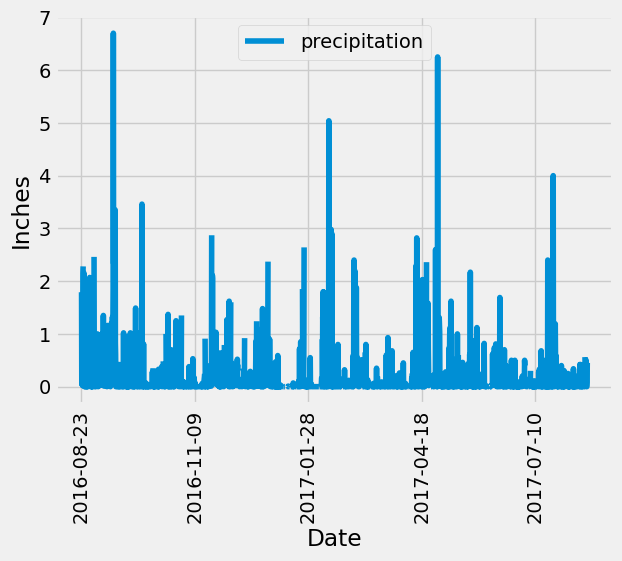

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df_indexed.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
count = session.query(station.name).count()
count

9

In [62]:
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc())
for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [64]:
#most active measurement station is: USC00519281

<bound method Query.first of <sqlalchemy.orm.query.Query object at 0x000002084A6742E0>>

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = session.query(measurement.station, func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == "USC00519281").all()
stats

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [69]:
#finding the most recent measurement from the most active station
most_active_date = session.query(measurement.date).filter(measurement.station == "USC00519281").order_by(measurement.date.desc())\
.first()
most_active_date

('2017-08-18',)

In [71]:
#getting twelve months of data
most_active_twelve = session.query(measurement.date, func.count(measurement.date)).filter(measurement.station == "USC00519281").\
filter(measurement.date >= '2016-08-18').group_by(measurement.date).order_by(measurement.date.desc()).all()
most_active_twelve

[('2017-08-18', 1),
 ('2017-08-17', 1),
 ('2017-08-16', 1),
 ('2017-08-15', 1),
 ('2017-08-14', 1),
 ('2017-08-13', 1),
 ('2017-08-06', 1),
 ('2017-08-05', 1),
 ('2017-08-04', 1),
 ('2017-07-31', 1),
 ('2017-07-30', 1),
 ('2017-07-29', 1),
 ('2017-07-28', 1),
 ('2017-07-27', 1),
 ('2017-07-26', 1),
 ('2017-07-25', 1),
 ('2017-07-24', 1),
 ('2017-07-23', 1),
 ('2017-07-22', 1),
 ('2017-07-21', 1),
 ('2017-07-20', 1),
 ('2017-07-19', 1),
 ('2017-07-18', 1),
 ('2017-07-17', 1),
 ('2017-07-16', 1),
 ('2017-07-15', 1),
 ('2017-07-14', 1),
 ('2017-07-13', 1),
 ('2017-07-12', 1),
 ('2017-07-11', 1),
 ('2017-07-10', 1),
 ('2017-07-09', 1),
 ('2017-07-08', 1),
 ('2017-07-07', 1),
 ('2017-07-06', 1),
 ('2017-07-05', 1),
 ('2017-07-04', 1),
 ('2017-07-03', 1),
 ('2017-07-02', 1),
 ('2017-07-01', 1),
 ('2017-06-30', 1),
 ('2017-06-29', 1),
 ('2017-06-28', 1),
 ('2017-06-27', 1),
 ('2017-06-26', 1),
 ('2017-06-25', 1),
 ('2017-06-24', 1),
 ('2017-06-23', 1),
 ('2017-06-22', 1),
 ('2017-06-21', 1),


In [80]:
most_active_twelve_tobs = session.query(measurement.tobs, func.count(measurement.tobs)).filter(measurement.station == "USC00519281").\
filter(measurement.date >= '2016-08-18').group_by(measurement.tobs).order_by(measurement.tobs.asc()).all()
most_active_twelve_tobs

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 23),
 (79.0, 20),
 (80.0, 12),
 (81.0, 5),
 (82.0, 3),
 (83.0, 1)]

In [81]:
df1=pd.DataFrame(most_active_twelve_tobs, columns = ['Temperature', 'Count'])
df1.head(2)

,Temperature,Count
0,59.0,3
1,60.0,2


In [82]:
df1_index = df1.set_index('Temperature')
df1_index.head()

,Count
Temperature,
59.0,3
60.0,2
61.0,1
62.0,6
63.0,4


In [85]:
renew = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
filter(measurement.date >= '2016-08-18').order_by(measurement.tobs.asc()).all()
renew

[(59.0,),
 (59.0,),
 (59.0,),
 (60.0,),
 (60.0,),
 (61.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (64.0,),
 (64.0,),
 (64.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (71.0,),


In [88]:
renew_df = pd.DataFrame(renew)
renew_df

,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
352,81.0
353,82.0
354,82.0
355,82.0


Text(0.5, 0, 'Temperature')

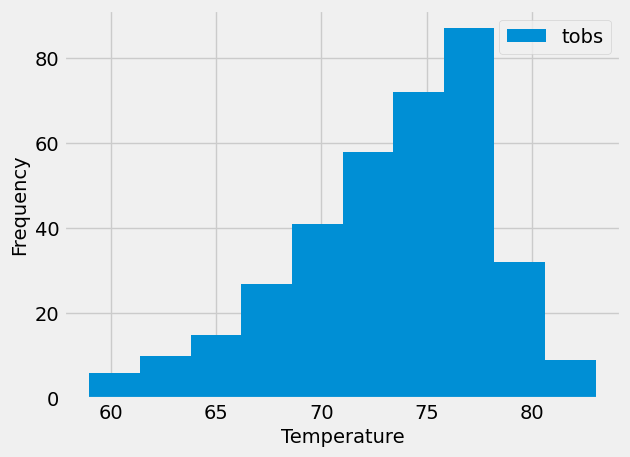

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

renew_df.plot(kind = "hist")
plt.xlabel('Temperature')

# Close Session

In [90]:
# Close Session
session.close()